In [2]:
import os
from PIL import Image
import numpy as np
from Nyang_dataset import Nyang_Dataset
from Nyang_dataset import NyangNyang_Dataset
from Nyang_dataloader import Nyang_DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from typing import List, Tuple
from Nyang_utils import Nyang_split
from Nyang_utils import Nyang_images_grid
from Nyang_transform import Nyang_transforms



In [22]:
# Nyang_split을 사용하지 않은 custom dataset

import os
import random

class Mnist_CustomDataset(Nyang_Dataset):

    def __init__(self, root_dir, mode="train", ratios=(0.8, 0.1, 0.1)):
        self.all_data = []
        self.all_labels = []
        self.root_dir = root_dir
        self.num_classes = 10  # MNIST 데이터셋은 10개의 클래스를 가집니다.
        self.ratios = ratios

        for label in range(self.num_classes):
            class_dir = os.path.join(self.root_dir, str(label))
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.all_data.append(image_path)
                self.all_labels.append(self.one_hot_encode(label))

        (self.train_data, self.valid_data, self.test_data), (self.train_labels, self.valid_labels, self.test_labels) = self.split_dataset()

        if mode == "train":
            self.data = self.train_data
            self.labels = self.train_labels
        elif mode == "valid":
            self.data = self.valid_data
            self.labels = self.valid_labels
        elif mode == "test":
            self.data = self.test_data
            self.labels = self.test_labels
        else:
            raise ValueError("Invalid mode. Choose ['train', 'valid', 'test']")

    def one_hot_encode(self, label):
        one_hot = [0] * self.num_classes
        one_hot[label] = 1
        return one_hot

    def split_dataset(self):
        combined = list(zip(self.all_data, self.all_labels))
        random.shuffle(combined)

        train_size = int(self.ratios[0] * len(combined))
        valid_size = int(self.ratios[1] * len(combined))

        train_data = combined[:train_size]
        valid_data = combined[train_size:train_size + valid_size]
        test_data = combined[train_size + valid_size:]

        train_data, train_labels = zip(*train_data)
        valid_data, valid_labels = zip(*valid_data)
        test_data, test_labels = zip(*test_data)

        return (list(train_data), list(valid_data), list(test_data)), (list(train_labels), list(valid_labels), list(test_labels))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data[idx]
        label = self.labels[idx]
        return image_path, label

In [23]:
# 데이터셋 생성
train_dataset = Mnist_CustomDataset(root_dir='mnist_data/', mode="train")
valid_dataset = Mnist_CustomDataset(root_dir='mnist_data/', mode="valid")
test_dataset = Mnist_CustomDataset(root_dir='mnist_data/', mode="test")

train_transform, valid_transform = Nyang_transforms()

# 데이터 로더 생성
train_loader = Nyang_DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, transform=train_transform)
valid_loader = Nyang_DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False, transform=valid_transform)
test_loader = Nyang_DataLoader(dataset=test_dataset, batch_size=32, shuffle=False, transform=valid_transform)


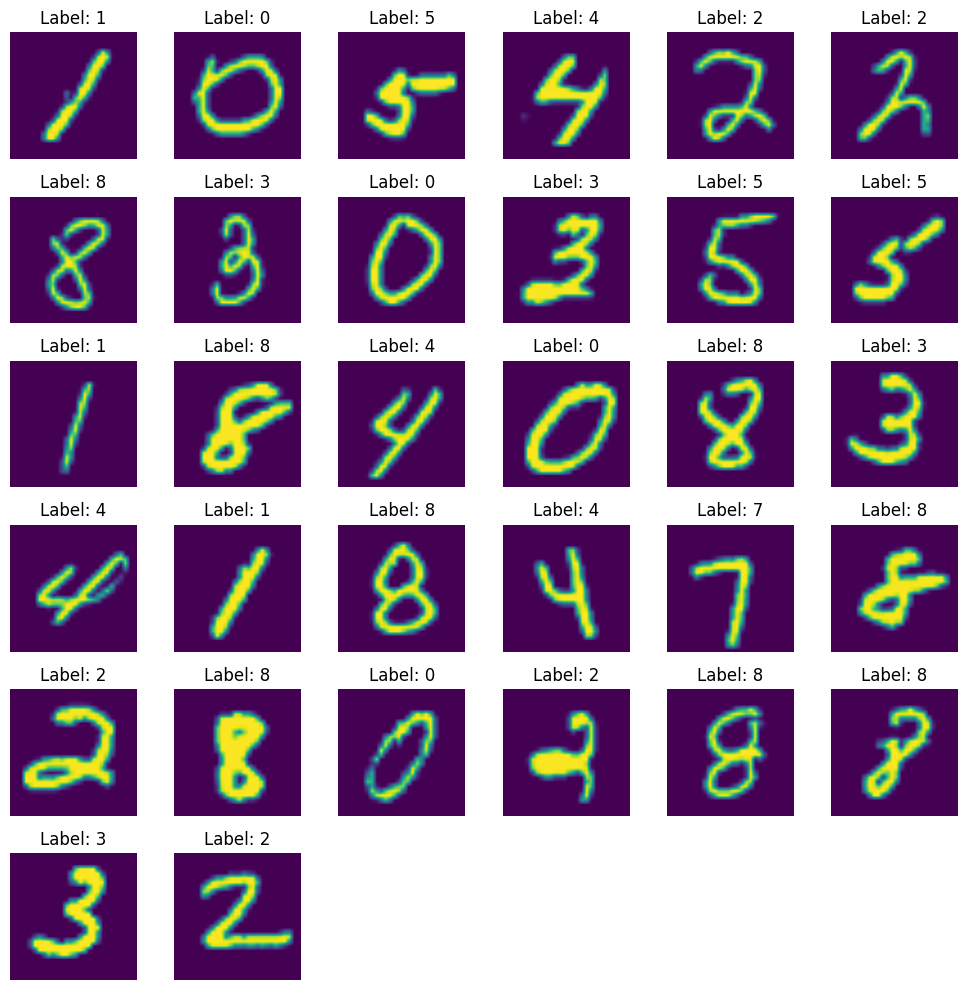

In [25]:
## dataloader test

# 첫 번째 배치 데이터 확인
for images, labels in valid_loader: # or train_loader
    # 배치 내의 이미지 수
    batch_size = len(images)

    # 이미지의 제곱근을 기반으로 그리드 크기를 결정 (예: 32 -> 6x6 그리드)
    grid_size = math.ceil(math.sqrt(batch_size))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // grid_size, i % grid_size]
        ax.imshow(image)
        
        # 원-핫 인코딩 풀기
        class_idx = label.index(1)
        
        ax.set_title(f"Label: {class_idx}")
        ax.axis('off')  # 축 정보 제거

    # 남은 서브플롯에 대한 표시 제거
    for i in range(batch_size, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')
    
    plt.tight_layout()
    plt.show()
    break







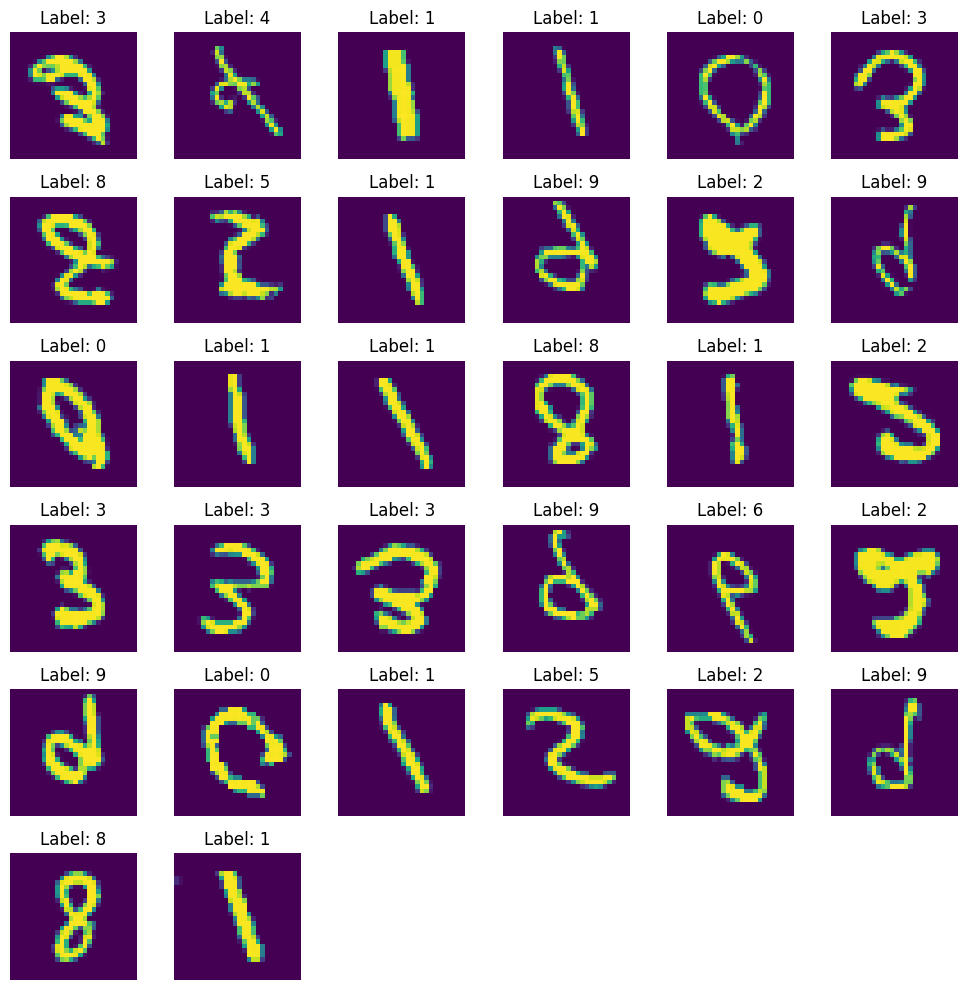

In [8]:
# dataloader test

# 첫 번째 배치 데이터 확인
for images, labels in train_loader: # or train_loader
    # 배치 내의 이미지 수
    batch_size = len(images)

    # 이미지의 제곱근을 기반으로 그리드 크기를 결정 (예: 32 -> 6x6 그리드)
    grid_size = math.ceil(math.sqrt(batch_size))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // grid_size, i % grid_size]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')  # 축 정보 제거

    # 남은 서브플롯에 대한 표시 제거
    for i in range(batch_size, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')
    
    plt.tight_layout()
    plt.show()
    break

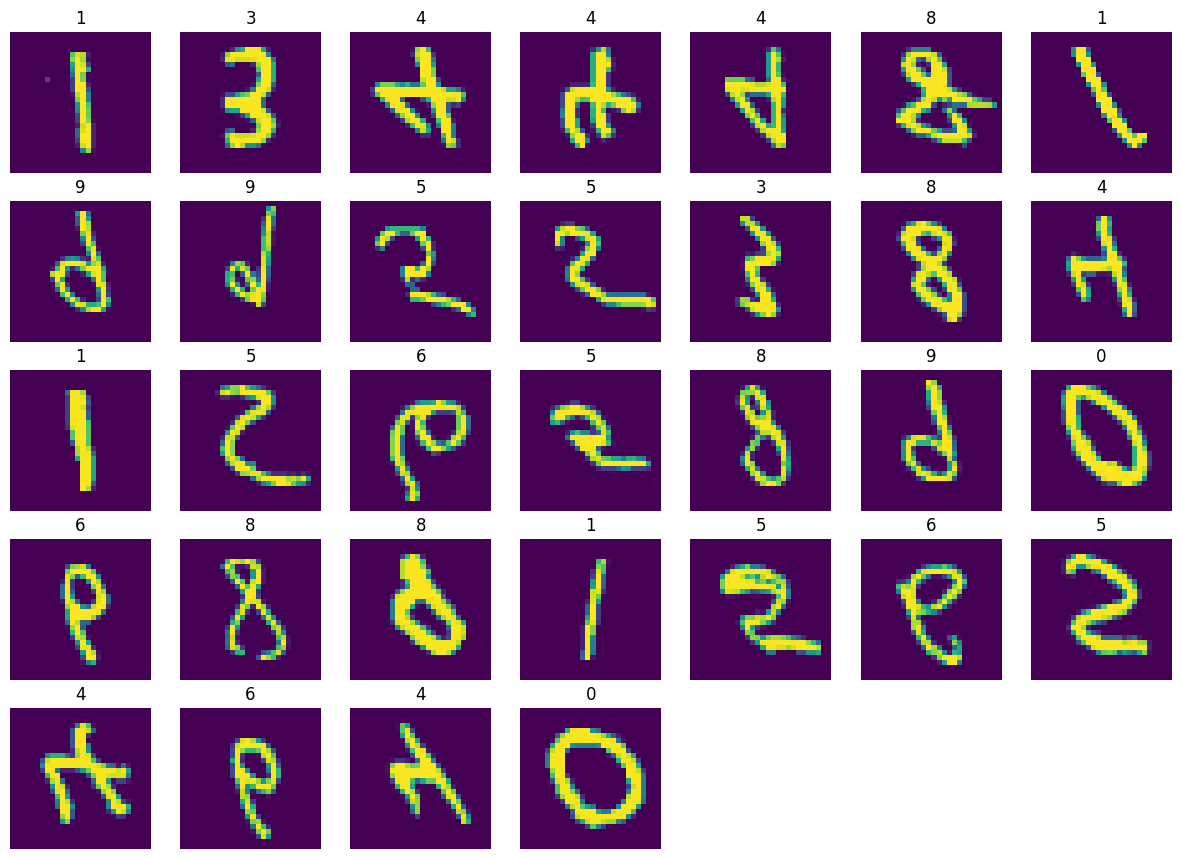

In [15]:
images, labels = next(iter(train_loader))
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8","9"]
#print(images)
Nyang_images_grid(images, labels, classes, nrows= 7, ncols=7)

In [19]:
# Nyang_split을 사용한 Customdataset
# Nyang_split을 이용해 쉽게 Train,Valid,Test를 나눌 수 있습니다.
# one hot incoding 까지 자동으로 됩니다.

class CustomDataset(Nyang_Dataset):
    
    def __init__(self, root_dir, classes, ratios = (0.8, 0.1, 0.1)):
        self.train_data, self.valid_data, self.test_data = Nyang_split(root_dir, classes, ratios)
        self.data = self.train_data  # 기본적으로 train 데이터로 설정
        
    def set_mode(self, mode: str):
        if mode == "train":
            self.data = self.train_data
        elif mode == "valid":
            self.data = self.valid_data
        elif mode == "test":
            self.data = self.test_data
        else:
            raise ValueError("Invalid mode. Choose from ['train', 'valid', 'test']")
        
        return self # method chaining
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx: int) -> Tuple[str, List[int]]:
        image_path, label = self.data[idx]
        return image_path, label 

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 128, 255,
         64,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255,
        255, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 

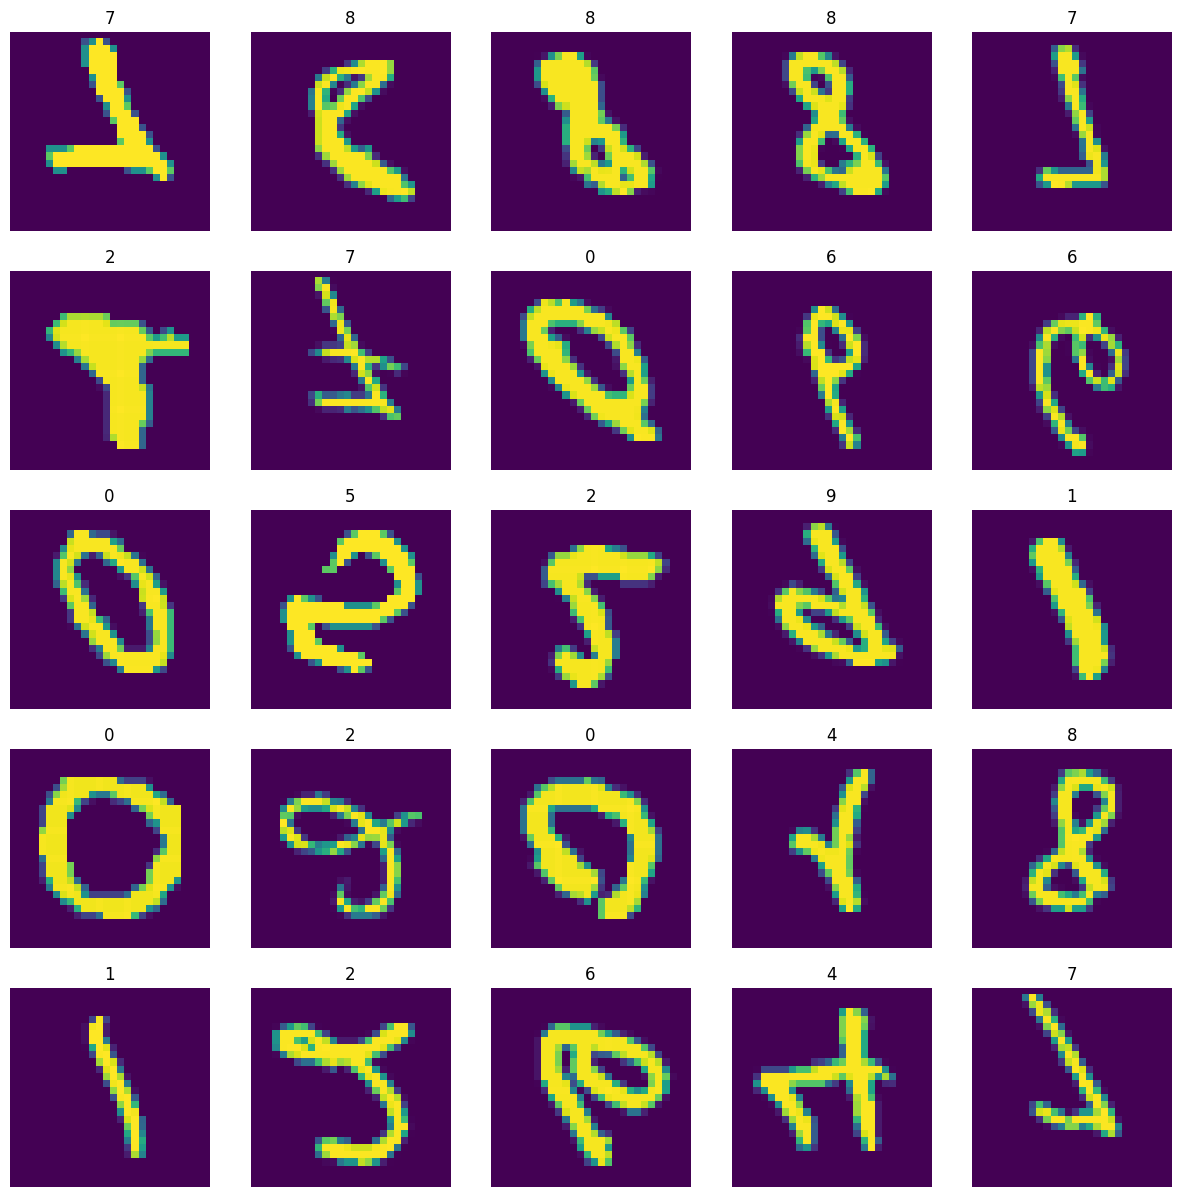

In [20]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "mnist_data"
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8","9"]
train_transform, valid_transform = Nyang_transforms()

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)
dataset.set_mode("train")  # train 모드로 설정

# Nyang_DataLoader 객체를 생성합니다.
batch_size = 32
shuffle = True
transform = train_transform
data_loader = Nyang_DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,transform=transform)

# 첫 번째 배치의 이미지들과 레이블을 그리드 형태로 시각화합니다.
images, labels = next(iter(data_loader))
print(images)
Nyang_images_grid(images, labels, classes, nrows=5, ncols=5)

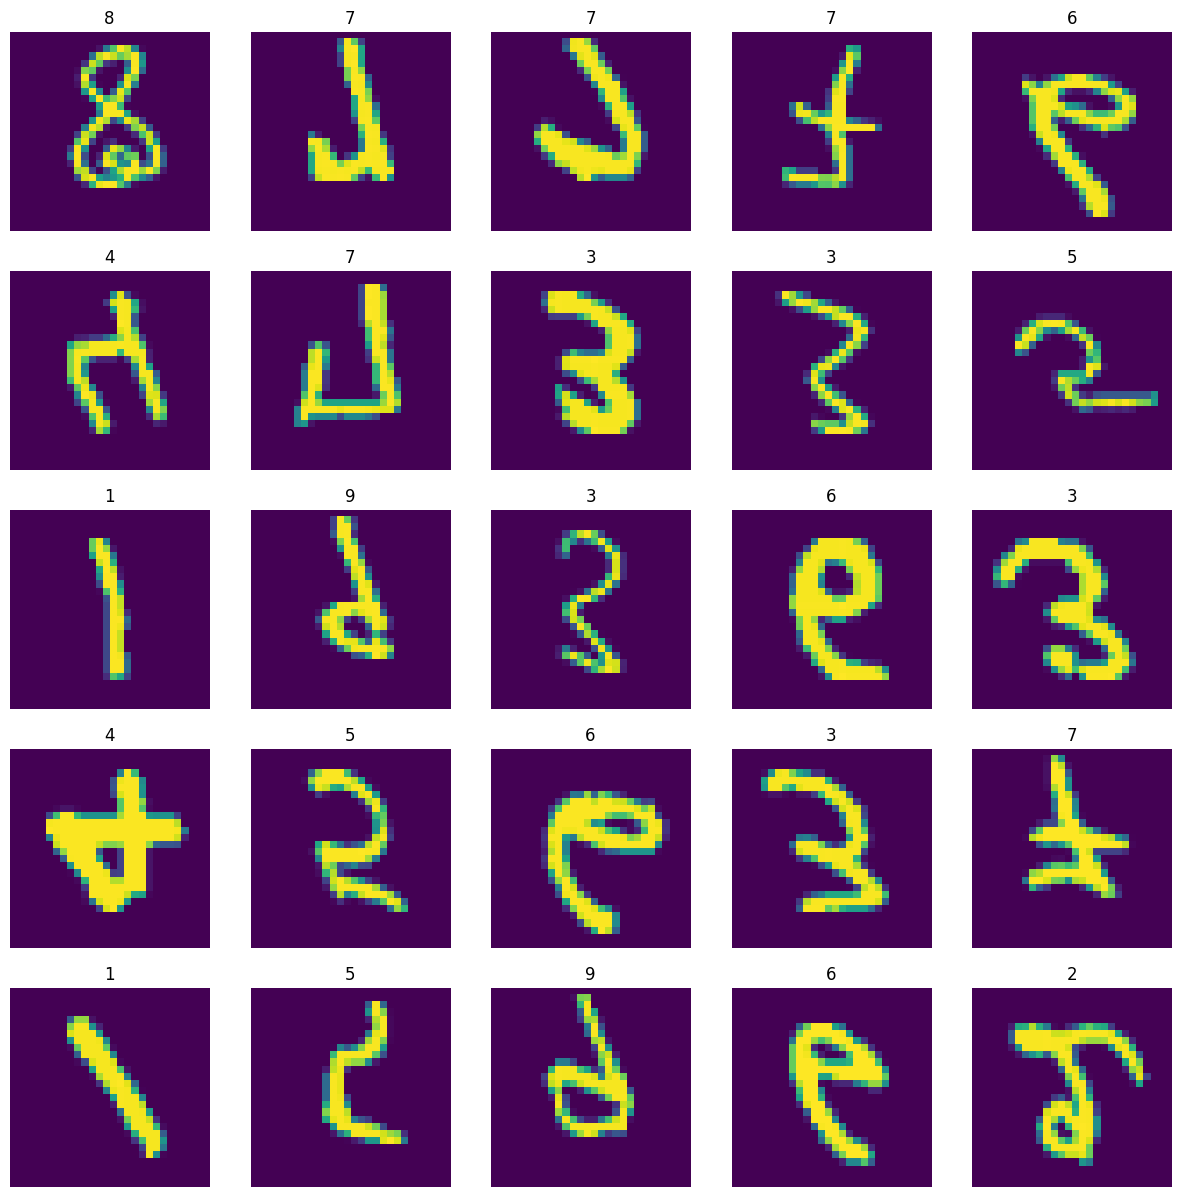

In [3]:
##### 데이터셋의 path와 class를 정의합니다. #######
root_dir = "mnist_data"
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8","9"]
train_transform, valid_transform = Nyang_transforms()

# CustomDataset 객체를 생성합니다.
dataset = NyangNyang_Dataset(root_dir, classes)
dataset.set_mode("train")  # train 모드로 설정

# Nyang_DataLoader 객체를 생성합니다.
batch_size = 32
shuffle = True
transform = train_transform
data_loader = Nyang_DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,transform=transform)

# 첫 번째 배치의 이미지들과 레이블을 그리드 형태로 시각화합니다.
images, labels = next(iter(data_loader))
Nyang_images_grid(images, labels, classes, nrows=5, ncols=5)

In [8]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "Catdog_data/PetImages"
classes = ["Cat", "Dog"]

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)

# train mode
train_datset = dataset.set_mode("train")
print("Train dataset size:", len(train_datset))

# valid mode
valid_datset = dataset.set_mode("valid")
print("Valid dataset size:", len(valid_datset))

# test mode
test_dataset = dataset.set_mode("test")
print("Test dataset size:", len(test_dataset))

# checking
image1, label1 = dataset[0]
print("Sample image path:", image1)
print("Sample label:", label1)

Train dataset size: 18732
Valid dataset size: 2341
Test dataset size: 2342
Sample image path: Catdog_data/PetImages/Cat/5227.jpg
Sample label: [1, 0]


In [3]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "Catdog_data/PetImages"
classes = ["Cat", "Dog"]
train_transform, valid_transform = Nyang_transforms()

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)
dataset.set_mode("train")  # train 모드로 설정

# Nyang_DataLoader 객체를 생성합니다.
batch_size = 32
shuffle = True
transform = train_transform
data_loader = Nyang_DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,transform=transform)


[array([[[ 72,  61,  65],
        [ 75,  64,  68],
        [ 79,  68,  72],
        ...,
        [107,  96, 100],
        [100,  89,  93],
        [101,  90,  94]],

       [[ 73,  62,  66],
        [ 73,  62,  66],
        [ 72,  61,  65],
        ...,
        [106,  95,  99],
        [102,  91,  95],
        [102,  91,  95]],

       [[ 69,  58,  62],
        [ 67,  56,  60],
        [ 63,  52,  56],
        ...,
        [ 97,  88,  91],
        [103,  92,  96],
        [103,  92,  96]],

       ...,

       [[135, 123, 127],
        [136, 124, 128],
        [136, 124, 128],
        ...,
        [ 61,  55,  55],
        [ 57,  51,  53],
        [ 57,  51,  53]],

       [[135, 123, 127],
        [136, 124, 128],
        [136, 124, 128],
        ...,
        [ 56,  50,  50],
        [ 56,  50,  52],
        [ 56,  50,  52]],

       [[135, 123, 127],
        [136, 124, 128],
        [136, 124, 128],
        ...,
        [ 60,  54,  54],
        [ 57,  51,  53],
        [ 57,  51,  53]

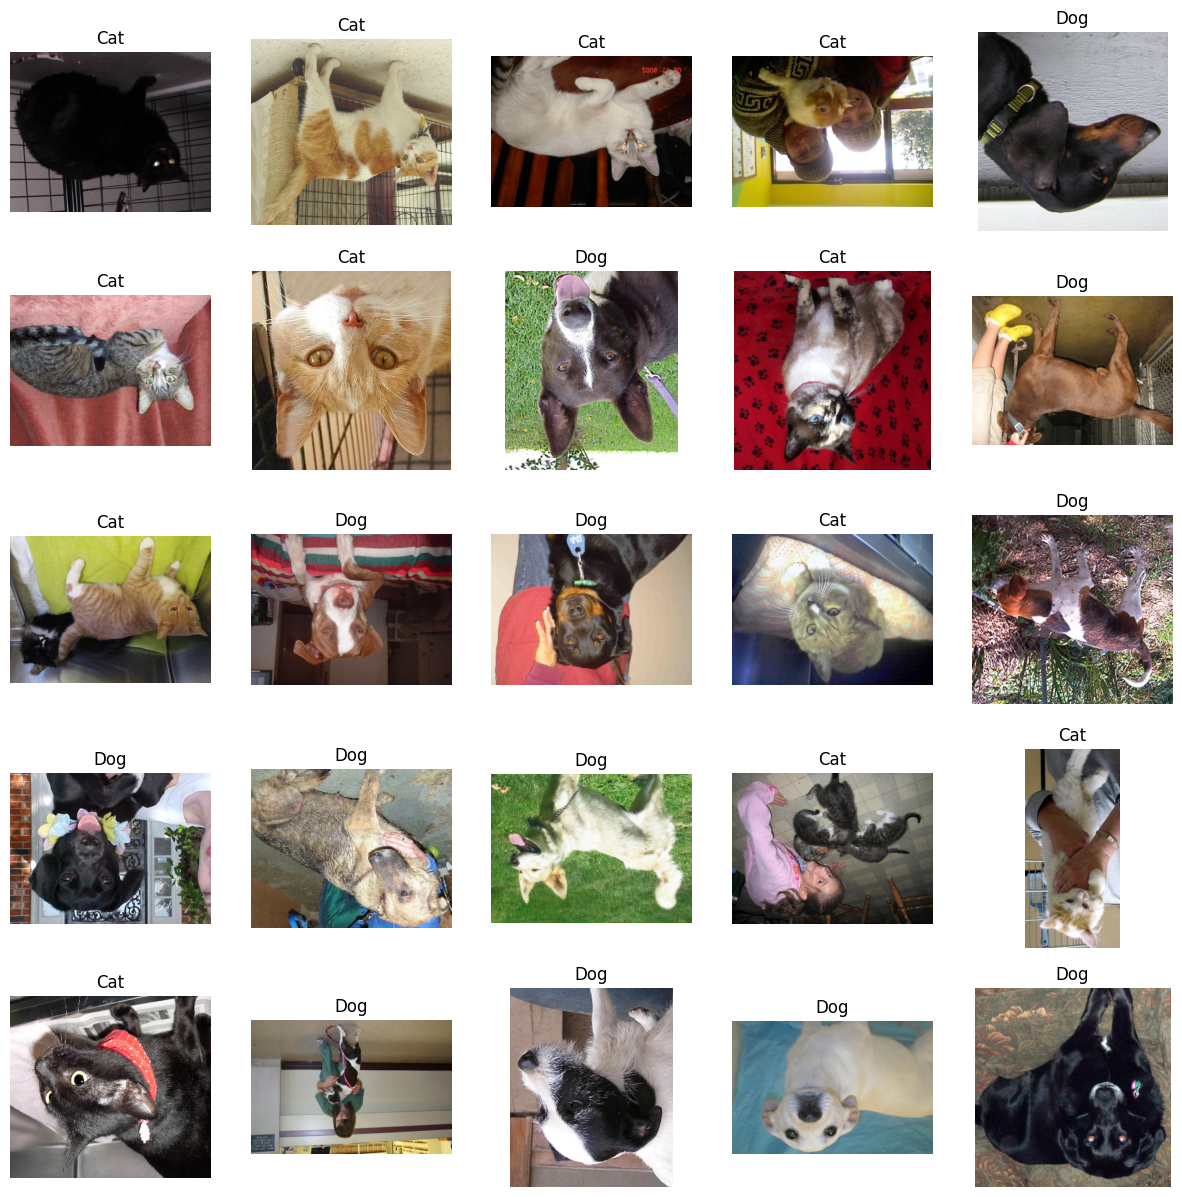

In [4]:
# 첫 번째 배치의 이미지들과 레이블을 그리드 형태로 시각화합니다.
images, labels = next(iter(data_loader))
print(images)
Nyang_images_grid(images, labels, classes, nrows=5, ncols=5)